In [ ]:
  import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv("ipl_data_cleaned.csv")
data.head()

,Unnamed: 0,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium Uppal,AY Dandekar,NJ Llong,Unknown
1,1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Unknown
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Unknown
3,3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Unknown
4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown,Unknown


In [ ]:
data.describe()

,Unnamed: 0,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,377.500000,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,218.382692,3464.478148,3.366895,0.156630,23.471144,3.387963
min,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,188.750000,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,377.500000,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,566.250000,567.250000,2016.000000,0.000000,19.000000,6.000000
max,755.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
data.isnull().sum()

Unnamed: 0         0
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [ ]:
#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

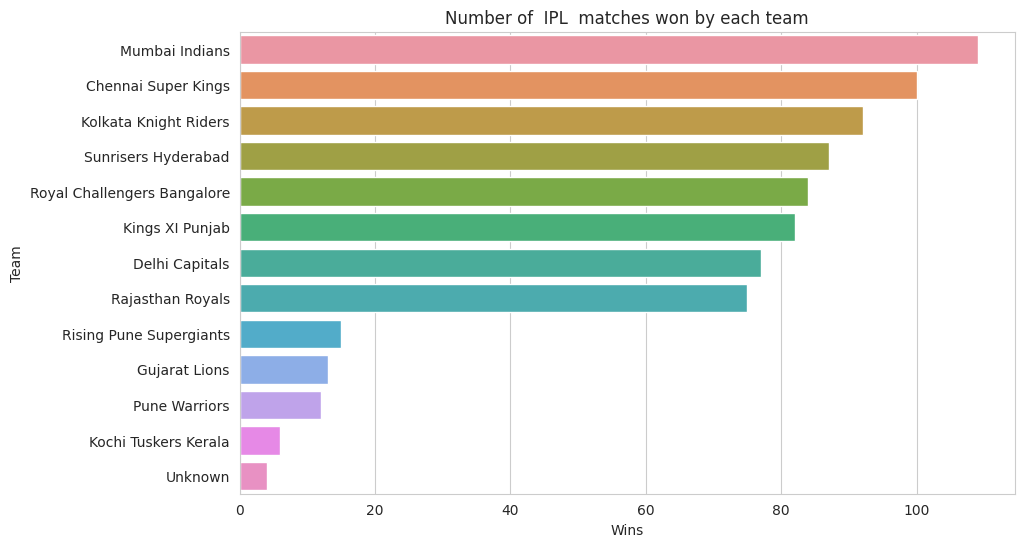

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

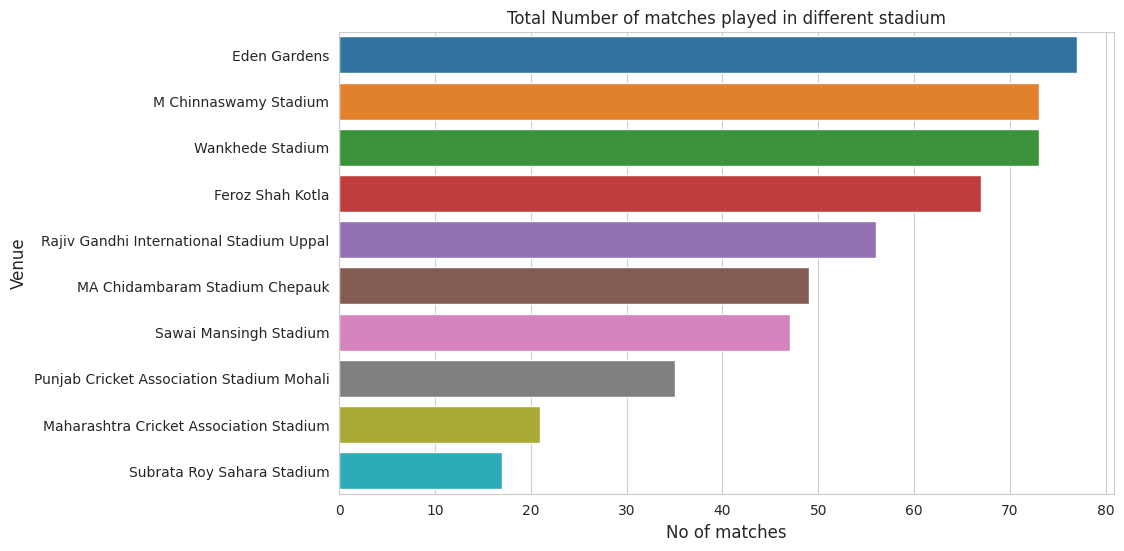

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

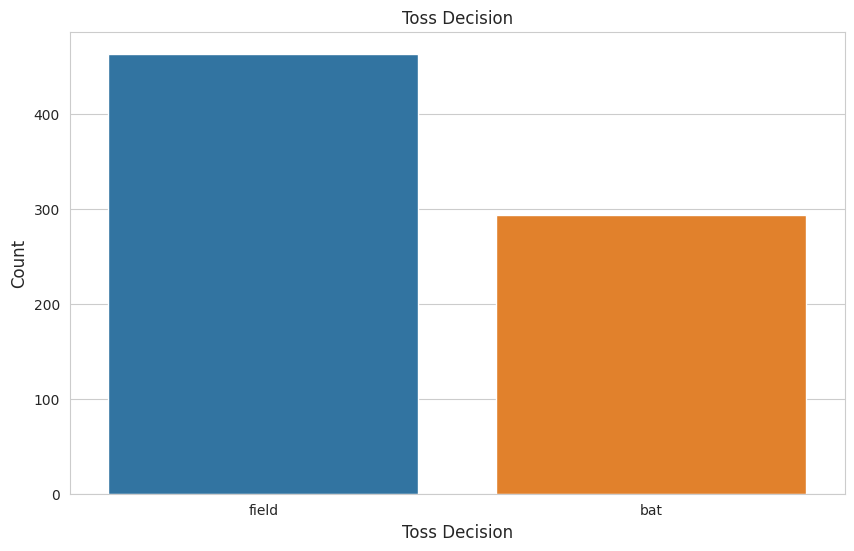

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [ ]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Dubai               7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanp

In [ ]:
data.drop(["id", "season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)
data.head()

,Unnamed: 0,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
0,0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Unknown
1,1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,Unknown
2,2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,Unknown
3,3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,Unknown
4,4,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,Unknown


In [ ]:
data.drop(["umpire3"], axis=1, inplace=True)
data.head()

,Unnamed: 0,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7
2,2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,4,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0


In [ ]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

In [ ]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [ ]:
ac

0.7811320754716982

<Axes: >

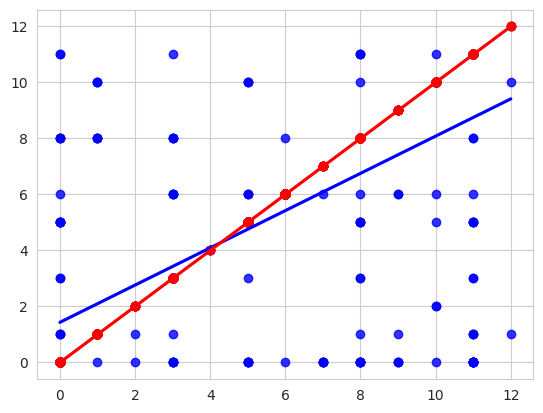

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")
sns.regplot(x=y_test, y=y_test, ci=None, color="r")

Toss fig 2


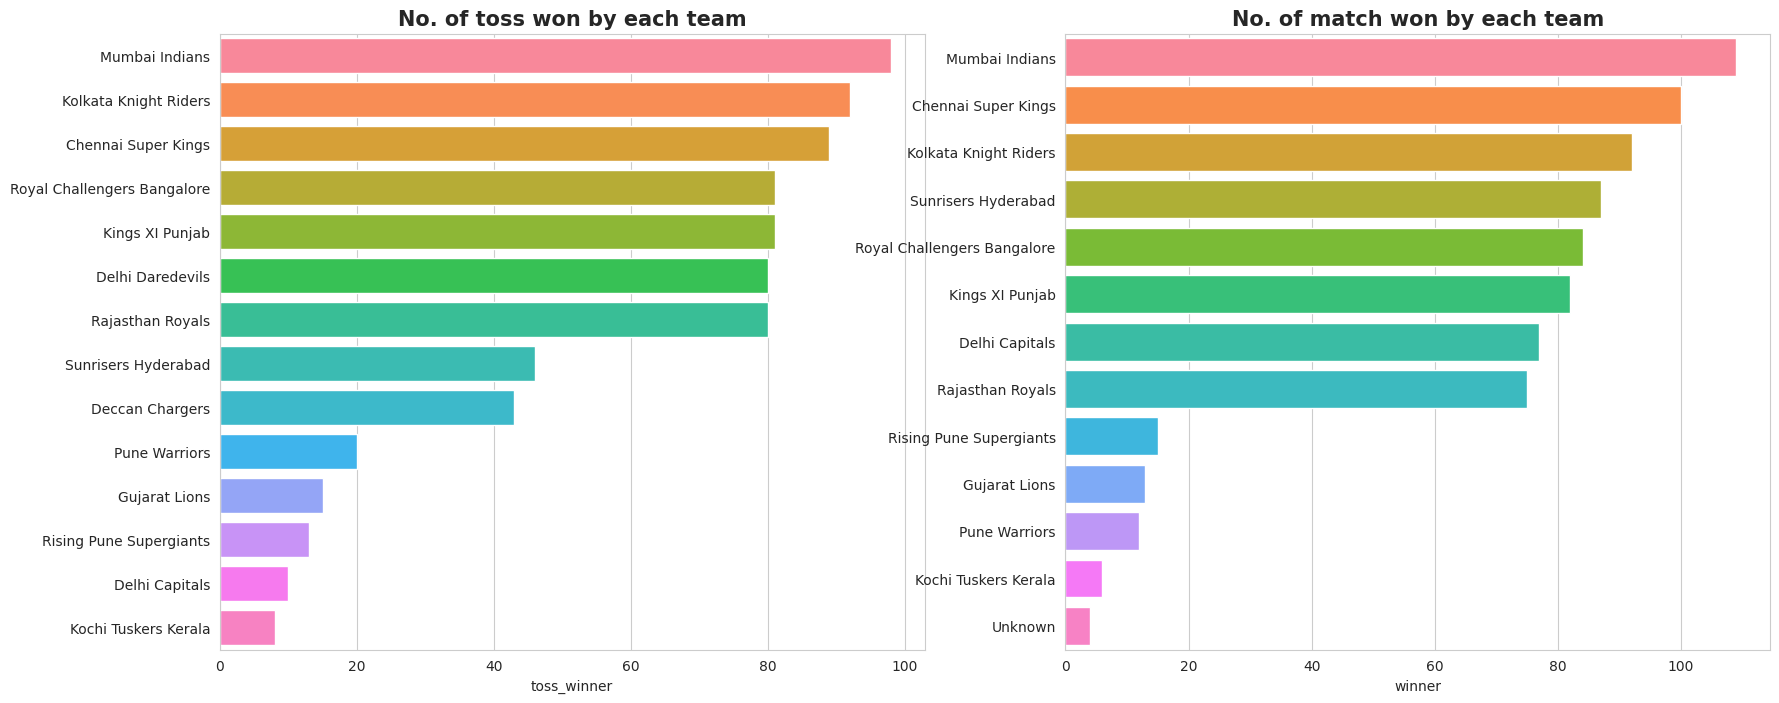

In [ ]:
# Tosses won by each team &
toss= data['toss_winner'].value_counts()
# sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')

# No of match won by each team
win=data.winner.value_counts()

print('Toss fig 2')

f, ax =  plt.subplots(1,2,figsize=(20,8))

sns.set(font_scale=1.2)  # to resize x & y ticks just remember its scale not size
sns.barplot(y=toss.index, x= toss, orient = 'h', saturation=1, ax=ax[0])
ax[0].set_title('No. of toss won by each team', fontweight='bold', fontsize=15 )
sns.barplot(y=win.index, x= win, orient = 'h', saturation=1, ax=ax[1])
ax[1].set_title('No. of match won by each team', fontweight='bold', fontsize=15 )
# plt.yticks(fontsize=12)
plt.show()

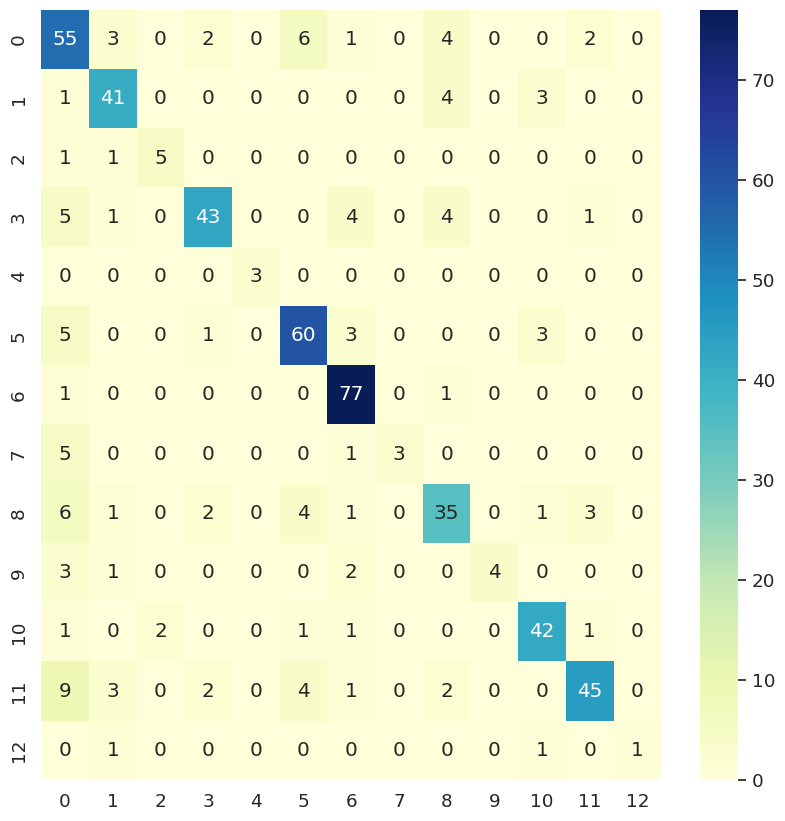

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        73
           1       0.79      0.84      0.81        49
           2       0.71      0.71      0.71         7
           3       0.86      0.74      0.80        58
           4       1.00      1.00      1.00         3
           5       0.80      0.83      0.82        72
           6       0.85      0.97      0.91        79
           7       1.00      0.33      0.50         9
           8       0.70      0.66      0.68        53
           9       1.00      0.40      0.57        10
          10       0.84      0.88      0.86        48
          11       0.87      0.68      0.76        66
          12       1.00      0.33      0.50         3

    accuracy                           0.78       530
   macro avg       0.85      0.70      0.74       530
weighted avg       0.79      0.78      0.78       530

